# Unsupervised Classification With Autoencoder
# Dog-Cat Example
## Arda Mavi
[Arda Mavi - GitHub](https://github.com/ardamavi)<br/>
[Dog-Cat GitHub Repo - Arda Mavi](https://github.com/ardamavi/Dog-Cat-Classifier)

### Summary:
In this project, we use autoencoders for Dog-Cat classification as unsupervised machine learning algorithms with Deep Learning.<br/>
#### Give the 'images' , then let the program do the rest!

# First we look up what is autoencoder:
## Dog-Cat Example:

In [1]:
# Arda Mavi
# Unsupervised Classification With Autoencoder

In [2]:
# Import
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Getting Dataset:
from get_dataset import get_dataset
X_train, X_test, Y_train, Y_test = get_dataset()

Training shape: (1259, 64, 64, 3)
1259 sample, 64 x 64 size RGB image.

Test shape: (140, 64, 64, 3)
140 sample, 64 x 64 size RGB image.

Examples:


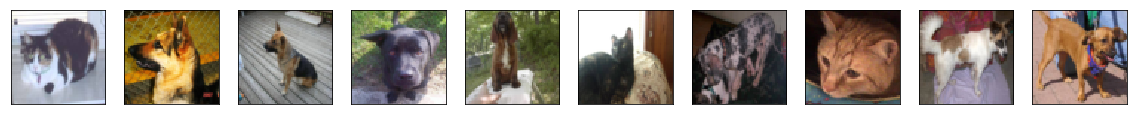

In [4]:
# About Dataset:
img_size = X_train.shape[1] # 64
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size RGB image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size RGB image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display some data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [6]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [7]:
# Training Model:
epochs = 4
batch_size = 1
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Train on 1259 samples, validate on 140 samples
Epoch 1/4
1259/1259 [==============================] - 43s - loss: 0.0191 - val_loss: 0.0093
Epoch 2/4
1259/1259 [==============================] - 43s - loss: 0.0097 - val_loss: 0.0109
Epoch 3/4
1259/1259 [==============================] - 44s - loss: 0.0080 - val_loss: 0.0067
Epoch 4/4
1259/1259 [==============================] - 41s - loss: 0.0072 - val_loss: 0.0073


In [8]:
decoded_imgs = autoencoder.predict(X_test)

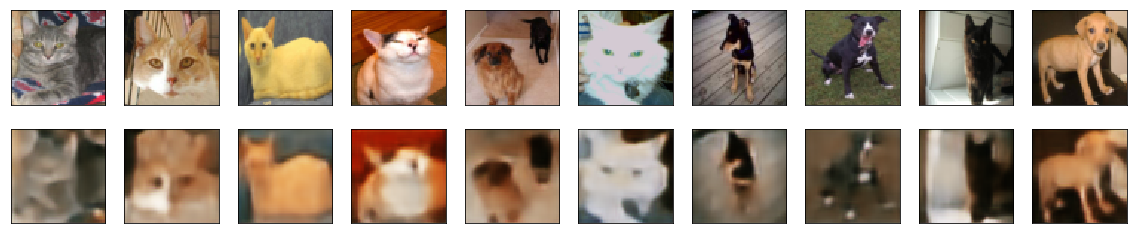

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display original:
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction:
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Now we use autoencoder for unsupervised classification:

In [ ]:
# Describe the number of classes:
num_class = 2

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Activation, Lambda, Reshape, Flatten
from keras.models import Model
from keras import backend as K

# Custom classifier function:
def classifier_func(x):
    return x+x*K.one_hot(K.argmax(x, axis=1), num_classes=num_class)

In [ ]:
# Deep Learning Model:

inputs = Input(shape=(64, 64, 3))
#Encoder:
conv_1 = Conv2D(32, (3,3), strides=(1,1))(inputs)
act_1 = Activation('relu')(conv_1)
maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_1)

conv_2 = Conv2D(64, (3,3), strides=(1,1), padding='same')(maxpool_1)
act_2 = Activation('relu')(conv_2)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_2)
    
flat_1 = Flatten()(maxpool_2)

fc_1 = Dense(256)(flat_1)
act_3 = Activation('relu')(fc_1)

fc_2 = Dense(128)(act_3)
act_4 = Activation('relu')(fc_2)

fc_3 = Dense(num_class)(act_4)

act_class = Lambda(classifier_func, output_shape=(num_class,))(fc_3)

#Decoder:
fc_4 = Dense(256)(act_class)
act_5 = Activation('relu')(fc_4)

fc_5 = Dense(14400)(act_5)
act_6 = Activation('relu')(fc_5)
reshape_1 = Reshape((15,15,64))(act_6)

upsample_1 = UpSampling2D((2, 2))(reshape_1)
deconv_1 = Conv2DTranspose(64, (3, 3), strides=(1, 1))(upsample_1)
act_7 = Activation('relu')(deconv_1)

upsample_2 = UpSampling2D((2, 2))(act_7)
deconv_2 = Conv2DTranspose(32, (3, 3), strides=(1, 1))(upsample_2)
act_8 = Activation('relu')(deconv_2)

conv_3 = Conv2D(3, (3, 3), strides=(1, 1))(act_8)
act_9 = Activation('sigmoid')(conv_3)

autoencoder = Model(inputs, act_9)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

In [ ]:
# Training Model:
epochs = 4
batch_size = 5
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i]*255)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i]*255)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# Split autoencoder:
encoder = Model(inputs, act_class)
encoder.summary()

#### Use the code to finding which cluster:
`np.argmax(<encoder_output>, axis=0)`

### Now we look up result:

In [ ]:
print(encoder.predict(X_train).shape)
print(np.argmax(encoder.predict(X_train), axis=1).shape)

In [ ]:
encode = encoder.predict(X_train)

class_dict = np.zeros((num_class, num_class))
for i, sample in enumerate(Y_train):
    class_dict[np.argmax(encode[i], axis=0)][np.argmax(sample)] += 1
    
print(class_dict)
    
neuron_class = np.zeros((num_class))
for i in range(num_class):
    neuron_class[i] = np.argmax(class_dict[i], axis=0)

print(neuron_class)

In [ ]:
# Getting class as string:
def cat_dog(model_output):
    if np.argmax(model_output, axis=0) == 0:
        return "Cat"
    else:
        return "Dog"

In [ ]:
encode = encoder.predict(X_test)

predicted = np.argmax(encode, axis=1)
for i, sample in enumerate(predicted):
    predicted[i] = neuron_class[predicted[i]]

comparison = predicted == np.argmax(Y_test, axis=1)
loss = 1 - np.sum(comparison.astype(int))/Y_test.shape[0]

print('Loss:', loss)
print('Examples:')
for i in range(10):
    plt.imshow(X_test[i]*255)
    plt.axis('off')
    plt.show()
    neuron = np.argmax(encode[i], axis=0)
    print('Class:', cat_dog(Y_test[i]), '- Model\'s Output Class:', cat_dog(neuron_class[neuron]),'\n'*2,'-'*40)

### Thats it! Thank you!
#### Still in development